<center>

*******************************************************************************************
<font size="4">
Generalised Cross-Wavelet Transform &nbsp; &nbsp; <br>
</font>

##### 20 September 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* The Generalised Cross-Wavelet Transform (GXWT) measures the interaction of two periodic signals at different time-scales, taking into account amplitude and absolute-valued phase coherence (when the phase difference is pi radians, it is considered in-phase).
>
* Dependencies:
    * [Generalised Cross-Wavelet Transform Matlab Functions](https://www.sciencedirect.com/science/article/pii/S0167945721001421?via%3Dihub#s0070) ("[external Matlab functions](#Specify-path-for-external-Matlab-functions)")
    * [Matlab](https://se.mathworks.com/products/matlab.html)
    * [Matlab Engine for Python](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
>
* Tested with:
    * Python 3.11
    * Matlab 2024b
    * Windows 11
>
* Reference:
    * Toiviainen, P., & Hartmann, M. (2022). Analyzing multidimensional movement interaction with generalized cross-wavelet transform. *Human Movement Science, 81*, 102894.
>
* Instructions:
    * Ensure that the dependecies are installed, then [specify the path for the external Matlab functions](#Specify-path-for-external-Matlab-functions).
    * Edit the values indicated with an arrow like this: <---

*******************************************************************************************

#### <ins> Matlab Engine Installation Notes </ins>

In the instructions below, the commands have to be typed in a command prompt program.

* [Installation instructions](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)
* [Adding path in user account doesn't need administrator privilege.](https://se.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html)

* If running Python in Anaconda environment:

    * [Path for Python interpreter](https://www.anaconda.com/docs/tools/working-with-conda/ide-tutorials/python-path)
    * If pip is not installed in the environment, make sure the environment is activated and install pip  with this command: conda install pip

* If "RuntimeError: No compatible MATLAB installation [...] This release of MATLAB Engine API for Python is compatible with version [XX]. The found versions were [YY]", use these commands:
    * to check installed Matlab's version: matlab -help
    * to install: python -m pip install matlabengine==[ZZ]
        * Note that [ZZ] has to be equal to the installed Matlab's version up to the sub-version.


In [1]:
import sys
import numpy as np

sc_path = '../src'
sys.path.append(sc_path)
import syncoord as sc

***
### Specify path for external Matlab functions
Found in supplementery material for Toiviainen & Hartmann (2022).

In [2]:
extfunc_path = r'C:/MyTemp/Matlab' # <--- folder with external Matlab functions

***
### Generate synthetic data

index; key; Name; duration (s):
  0; 0; Test Data; 0:16.0


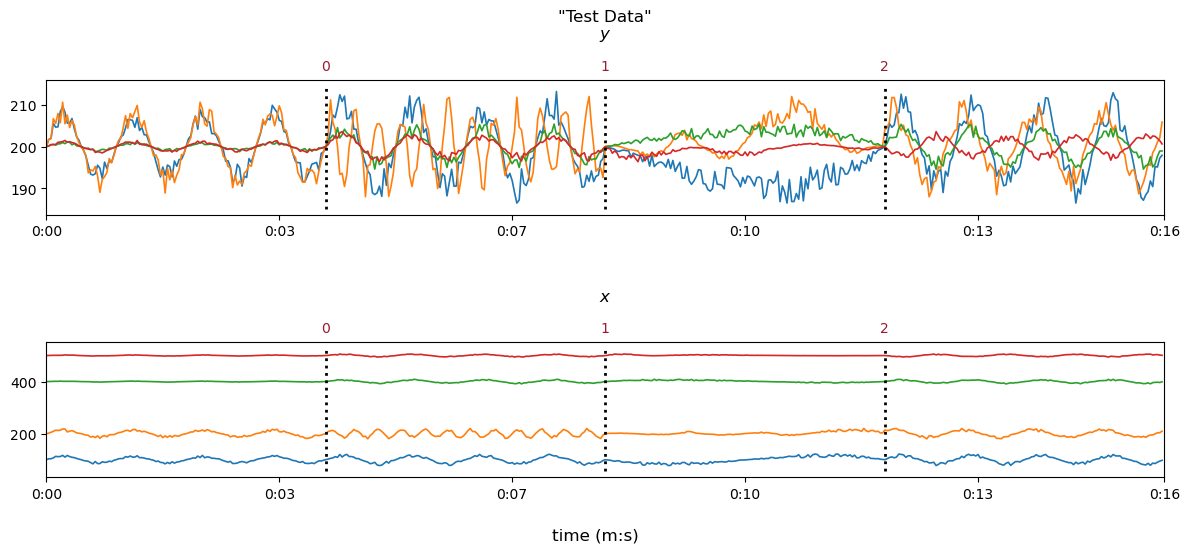

In [3]:
base_freq = 1     # <--- baseline frequency (Hz)
shuffseed = None  # <--- None = don't shuffle sections, int = shuffle sections

testdata_vars = sc.utils.init_testdatavars(seed=1)
testdata_vars['point_vars'][[0,1,3],...,0] = base_freq
testdata_vars['point_vars'][1,1,...,0] = base_freq * 3
if shuffseed is not None:
    rangen = np.random.default_rng(seed=shuffseed)
    rangen.shuffle(testdata_vars['point_vars'])
test_data_1 = sc.ptdata.load( testdata_vars, print_info=True )
test_data_1.visualise( vscale=1.2, dlattr='1.2' )

Unshuffled sections:
>0. All synchronised at baseline frequency, but signals 0 and 1 have higher amplitude.
>1. As in section 0, but signal 1 has triple the baseline frequency.
>2. Random oscillation.
>3. All have baseline frequency, but with constant phase differences: 1/8 cycle for signals 0 and 1; 1/2 cycle (*out of phase*) for signals 2 and 3.

Also each signal has distinct random noise.

***
### Pairwise Generalised Cross-Wavelet Transform

In [5]:
print('dimensions (axes): ',test_data_1.names.dim)

dimensions (axes):  ['point', 'axis', 'frame']


Connecting to Matlab...
...connected to Matlab version 24.2.0.2712019 (R2024b)


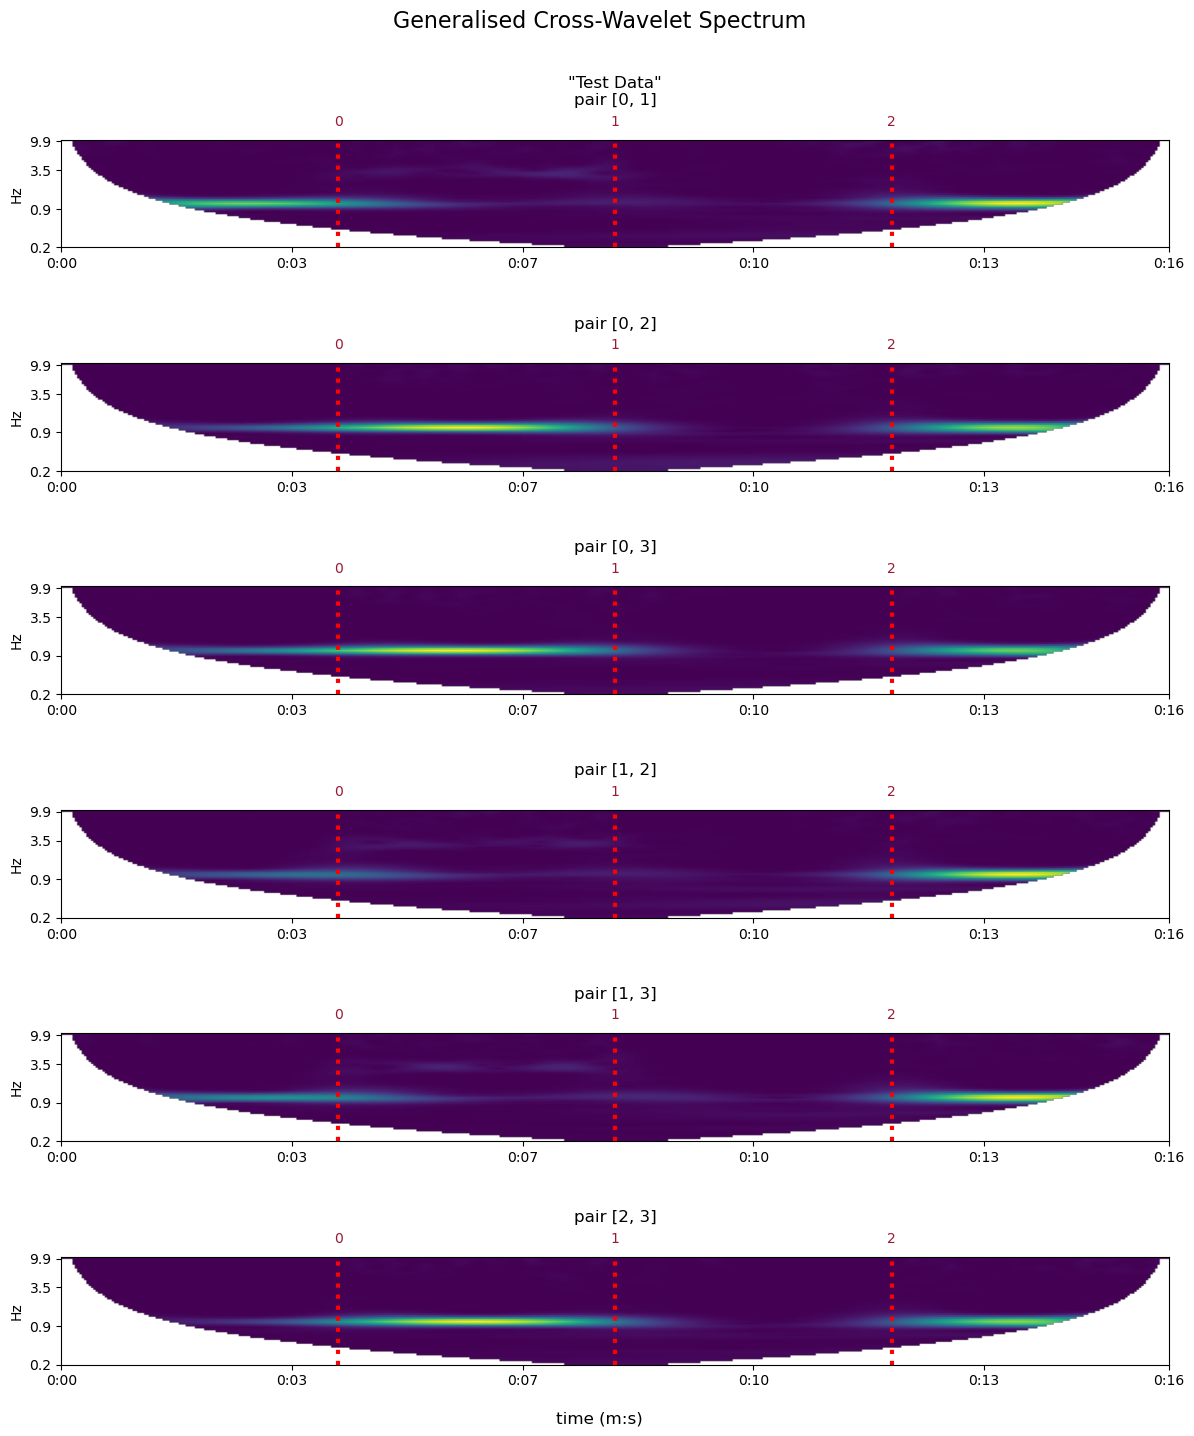

In [6]:
minmaxf = [0.1,10] # <--- minimum and maximum frequencies (Hz)

pairs_axis = 0
fixed_axes = [-2,-1]
gxwtdata = sc.ptdata.gxwt( test_data_1, minmaxf, pairs_axis, fixed_axes,
                           postprocess='coinan', extfunc_path=extfunc_path )
gxwtdata.visualise( dlattr='1.2' )

>
#### Average Generalised Cross-Wavelet Power Spectrum for group

C:\Users/juigmend/local_documents/SynCoord/src\syncoord\ptdata.py:1199: RuntimeWarning: Mean of empty slice
  dd_out[k] = np.nanmean(dd_in[k],axis=axis)


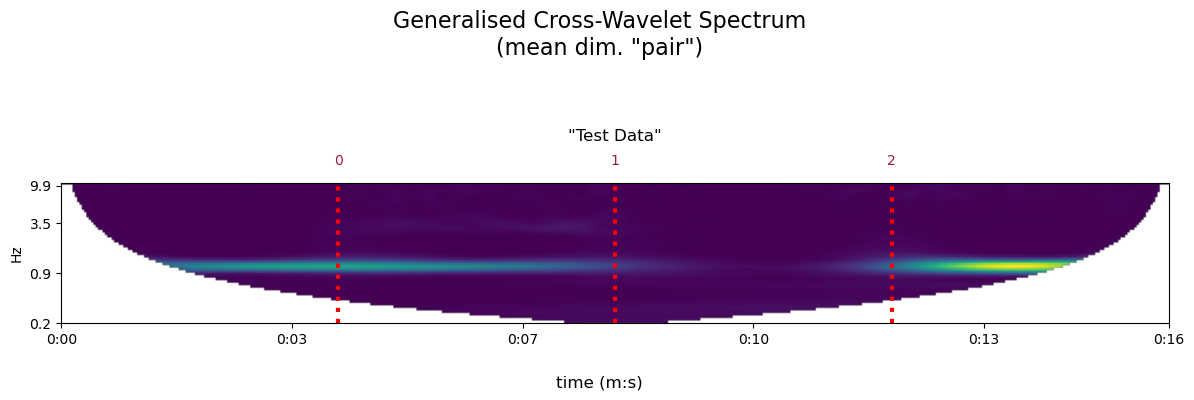

In [7]:
gxwtdata_aggr_pairs = sc.ptdata.aggrax( gxwtdata, axis=0, function='mean' )
gxwtdata_aggr_pairs.visualise( vscale=1.4, dlattr='1.2' )

>
#### Average Generalised Cross-Wavelet Power for group

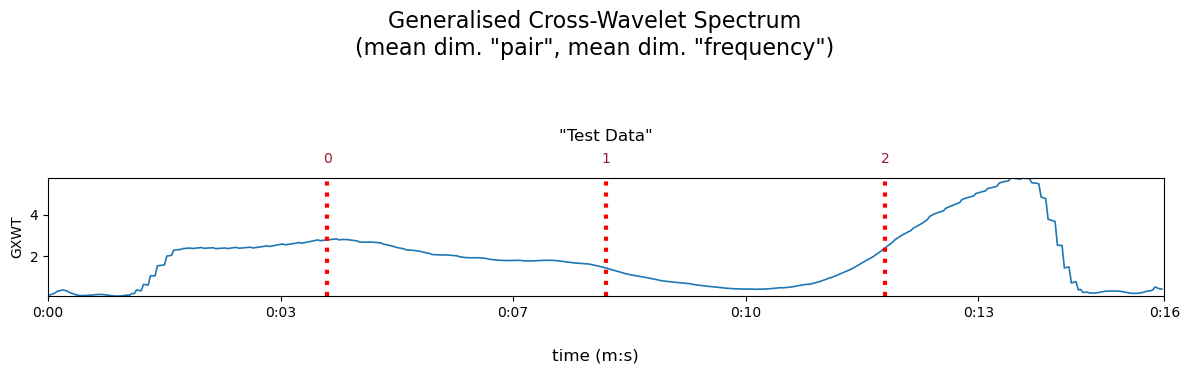

In [8]:
gxwtdata_aggr_top = sc.ptdata.aggrax( gxwtdata_aggr_pairs, axis=0, function='mean' )
gxwtdata_aggr_top.visualise( vscale=1.3, vistype='line', dlattr='1.2' )

>
#### Sections' statistics

means = [1.571, 2.095, 0.871, 2.97]


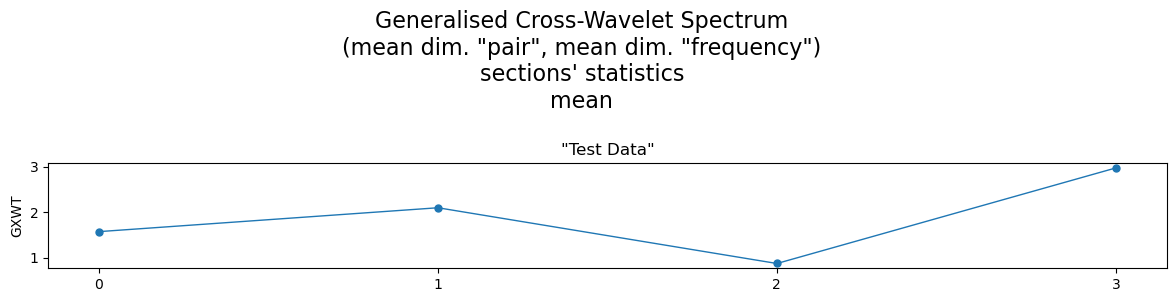

In [9]:
gxwtdata_aggr_top_stats = sc.ptdata.secstats( gxwtdata_aggr_top, margins=None,
                                              omitnan=True, last=True )
gxwtdata_aggr_top_stats.visualise( statistics='mean' )
print('means =','['+', '.join([str(v) for v in np.round(gxwtdata_aggr_top_stats.data[0][0],3)])+']')